### Импорт библиотек и загрузка соответсвующих датасетов

In [ ]:
# google drive mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("/content/drive/MyDrive/sccl"): #('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/drive/MyDrive/sccl/ans2.csv
/content/drive/MyDrive/sccl/train.csv
/content/drive/MyDrive/sccl/test.csv
/content/drive/MyDrive/sccl/ans_3.csv
/content/drive/MyDrive/sccl/ans_1.csv
/content/drive/MyDrive/sccl/ans_2.csv
/content/drive/MyDrive/sccl/ans_4.csv
/content/drive/MyDrive/sccl/ans.csv
/content/drive/MyDrive/sccl/ans_7.csv
/content/drive/MyDrive/sccl/ans_8.csv
/content/drive/MyDrive/sccl/ans_9.csv
/content/drive/MyDrive/sccl/ans_888.csv
/content/drive/MyDrive/sccl/ans_8888.csv
/content/drive/MyDrive/sccl/ans_88888.csv
/content/drive/MyDrive/sccl/ans_777.csv
/content/drive/MyDrive/sccl/ans_2_2.csv
/content/drive/MyDrive/sccl/ans_5.csv
/content/drive/MyDrive/sccl/ans_11.csv


In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/sccl/train.csv', delimiter=';')
data_test = pd.read_csv('/content/drive/MyDrive/sccl/test.csv', delimiter=';')

train_percent = len(data_train) / (len(data_train) + len(data_test)) * 100
print(f"Train shape: {data_train.shape} ({train_percent:.2f}%)\nTest shape:  {data_test.shape}  ({100-train_percent:.2f}%)")

Train shape: (14312, 124) (80.00%)
Test shape:  (3579, 124)  (20.00%)


### Пример данных датасета и описание его колонок-features 

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): # full printing without data reduction
    display(data_train.head())

pd.set_option('display.max_columns', None)

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,F2330,F2340,F2350,F2400,F2410,F1150_LAG1,F1230_LAG1,F1410_LAG1,F1510_LAG1,F1520_LAG1,F2110_LAG1,F2120_LAG1,F2200_LAG1,F2210_LAG1,F2220_LAG1,F2300_LAG1,F2320_LAG1,F2330_LAG1,F2400_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,2746,3907,13MAR2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17APR2017:00:00:00,NaN,NaN,NaN,20.0,30.0,2.070100e+10,30.0,NaN,17APR2017:00:00:00,17APR2017:00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.11,0.0,0.0,1.0,21577.0,0.0,0.0,0.0,1.0,21577.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,женский,Российская Федерация
1,9843,8677,12SEP2018:00:00:00,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1379000.0,44000.0,NaN,821000.0,NaN,514000.0,NaN,10000.0,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1369000.0,15000.0,1354000.0,NaN,NaN,1379000.0,1379000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,14AUG2017:00:00:00,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,65.0,34.0,6.570100e+10,34.0,0 .. 5,14AUG2017:00:00:00,01JAN1960:00:00:00,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,46.69.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2723,5327,13MAR2018:00:00:00,0,1,7000.0,NaN,NaN,NaN,NaN,7000.0,NaN,149926000.0,9169000.0,11000.0,102035000.0,18609000.0,20097000.0,5000.0,1638000.0,10000.0,NaN,NaN,NaN,1628000.0,115000.0,NaN,115000.0,NaN,148179000.0,15146000.0,133033000.0,NaN,NaN,149933000.0,149933000.0,25658000.0,203434000.0,177776000.0,-3566000.0,25999000.0,3225000.0,1818000.0,NaN,NaN,NaN,6875000.0,1491000.0,1304000.0,482000.0,NaN,2502000.0,NaN,7000.0,7130000.0,2557000.0,2104000.0,446000.0,7000.0,NaN,434000.0,NaN,NaN,347000.0,1.0,28APR2014:00:00:00,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,46.0,30.0,4.671500e+10,30.0,16 .. 50,28APR2014:00:00:00,01JAN1960:00:00:00,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,01.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1538,5159,05FEB2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na



Название поля | Описание
--- | --- |
id_contract | Идентификатор контракта
id_client | Идентификатор клиента
SIGN_DATE | Дата подписания контракта
IP_flag | Флаг ИП
TARGET | Целевая переменная - факт наличия предъявления по гарантии
F1100 | Внеоборотные активы
F1110 | Нематериальные активы
F1150 | Основные средства
F1160 | Доходные вложения в материальные ценности
F1170 | Долгосрочные финансовые вложения
F1180 | Отложенные налоговые активы
F1190 | Прочие внеоборотные активы
F1200 | Оборотные активы
F1210 | Запасы
F1220 | НДС по приобретенным ценностям
F1230 | Дебиторская задолженность
F1240 | Краткосрочные финансовые вложения
F1250 | Дебиторская задолженность
F1260 | Прочие оборотные активы
F1300 | Капитал и резервы
F1310 | Уставный капитал
F1320 | Собственные акции, выкупленные у акционеров
F1350 | Добавочный капитал
F1360 | Резервный капитал
F1370 | Нераспределенная прибыль (непокрытый убыток)
F1400 | Долгосрочные обязательства
F1410 | Заёмные средства (долгосрочные)
F1420 | Отложенные налоговые обязательства
F1450 | Прочие долгосрочные обязательства
F1500 | Краткосрочные обязательства
F1510 | Заёмные средства (краткосрочные)
F1520 | Кредиторская задолженность
F1530 | Доходы будущих периодов
F1550 | Прочие краткосрочные обязательства
F1600 | Активы всего
F1700 | Пассивы всего
F2100 | Валовая прибыль (убыток)
F2110 | Выручка
F2120 | Себестоимость продаж
F2200 | Прибыль (убыток) от продажи
F2210 | Коммерческие расходы
F2220 | Управленческие расходы
F2300 | Прибыль (убыток) до налогообложения
F2310 | Доходы от участия в других организациях
F2320 | Проценты к получению
F2330 | Проценты к уплате
F2340 | Прочие доходы
F2350 | Прочие расходы
F2400 | Чистая прибыль (убыток)
F2410 | Текущий налог на прибыль
F1150_LAG1 | Основные средства (предыдущий период)
F1230_LAG1 | Дебиторская задолженность (предыдущий период)
F1410_LAG1 | Заёмные средства (долгосрочные) (предыдущий период)
F1510_LAG1 | Заёмные средства (краткосрочные) (предыдущий период)
F1520_LAG1 | Кредиторская задолженность (предыдущий период)
F2110_LAG1 | Выручка (предыдущий период)
F2120_LAG1 | Себестоимость продаж (предыдущий период)
F2200_LAG1 | Прибыль (убыток) от продажи (предыдущий период)
F2210_LAG1 | Коммерческие расходы (предыдущий период)
F2220_LAG1 | Управленческие расходы (предыдущий период)
F2300_LAG1 | Прибыль (убыток) до налогообложения (предыдущий период)
F2320_LAG1 | Проценты к получению (предыдущий период)
F2330_LAG1 | Проценты к уплате (предыдущий период)
F2400_LAG1 | Чистая прибыль (убыток) (предыдущий период)
EGRPOINCLUDED | Признак включения в ЕГРПО (Росстат)
DATEFIRSTREG | Дата регистрации
OKFS_GROUP | Группа ОКФС
OKOPF_GROUP | Группа ОКОПФ
OKOGU_GROUP | Группа ОКОГУ
OKATO_REGIONCODE | ОКАТО. Код региона
OKATO_FED | Код федерального округа по ОКАТО
OKTMO_CODE | ОКТМО. Код
OKTMO_FED | Код федерального округа по ОКОТМО
WORKERSRANGE | Диапазон численности персонала
TAXREG_REGDATE | Регистрация в ФНС. Дата регистрации
TAXREGPAY_REGDATE | Регистрация в налоговом органе. Дата регистрации
COUNTCOOWNERFCSM | Структура компании. Количество совладельцев (Данные компании/ФСФР)
COUNTCOOWNERROSSTAT | Структура компании. Количество совладельцев (Ростат)
COUNTCOOWNEREGRUL | Структура компании. Количество совладельцев (ЕГРЮЛ)
COUNTBRANCH | Структура компании. Количество филиалов (Данные компании)
COUNTBRANCHROSSTAT | Структура компании. Количество филиалов (Росстат)
COUNTBRANCHEGRUL | Структура компании. Количество филиалов (ЕГРЮЛ)
TELEPHONECOUNT | Количество компаний с аналогичными телефоном
MANAGERCOUNTINCOUNTRY | Количество компаний с аналогичным ФИО руководителя (поиск по ФИО руководителя среди всех действующих компаний)
MANAGERCOUNTINREGION | Количество компаний с аналогичным ФИО руководителя (поиск по ФИО руководителя среди действующих компаний, зарегистрированных в том же регионе)
MANAGERINNCOUNT | Количество компаний с аналогичным ИНН руководителя (поиск по ИНН руководителя среди всех действующих компаний)
OKVED_CODE | ОКВЭД
PLAINTIFF_CASESNUMBER_YEAR | Участие в арбитражных делах в качестве истца. Количество дел (за последний год)
PLAINTIFF_SUM_YEAR | Участие в арбитражных делах в качестве истца. Сумма, руб. (за последний год)
DEFENDANT_CASESNUMBER_YEAR | Участие в арбитражных делах в качестве ответчика. Количество дел (за последний год)
DEFENDANT_SUM_YEAR | Участие в арбитражных делах в качестве ответчика. Сумма, руб. (за последний год)
THIRDOROTHERPERSON_YEAR | Участие в арбитражных делах в качестве третьего лица. (за последний год)
PLAINTIFF_CASESNUMBER_EVER | Участие в арбитражных делах в качестве истца. Количество дел (за все время)
PLAINTIFF_SUM_EVER | Участие в арбитражных делах в качестве истца. Сумма, руб. (за все время)
DEFENDANT_CASESNUMBER_EVER | Участие в арбитражных делах в качестве ответчика. Количество дел (за все время)
DEFENDANT_SUM_EVER | Участие в арбитражных делах в качестве ответчика. Сумма, руб. (за все время)
THIRDOROTHERPERSON_EVER | Участие в арбитражных делах в качестве третьего лица. (за все время)
ADMITTEDNUMBER_233_YEAR | Данные о тендерах за последний год. Число допусков к тендеру (ФЗ 223)
NOTADMITTEDNUMBER_233_YEAR | Данные о тендерах за последний год. Число не допусков к тендеру (ФЗ 223)
WINNERNUMBER_233_YEAR | Данные о тендерах за последний год. Число выигрышей тендеров (ФЗ 223)
SIGNEDNUMBER_233_YEAR | Данные о госконтрактах за последний год. Число подписанных контрактов (ФЗ 223)
SUM_233_YEAR | Данные о госконтрактах за последний год. Контрактов подписано на сумму, руб. (ФЗ 223)
ADMITTEDNUMBER_233_EVER | Данные о тендерах за все время. Число допусков к тендеру (ФЗ 223)
NOTADMITTEDNUMBER_233_EVER | Данные о тендерах за все время. Число не допусков к тендеру (ФЗ 223)
WINNERNUMBER_233_EVER | Данные о тендерах за все время. Число выигрышей тендеров (ФЗ 223)
SIGNEDNUMBER_233_EVER | Данные о госконтрактах за все время. Число подписанных контрактов (ФЗ 223)
SUM_233_EVER | Данные о госконтрактах за все время. Контрактов подписано на сумму, руб. (ФЗ 223)
ADMITTEDNUMBER_95_YEAR | Данные о тендерах за последний год. Число допусков к тендеру (ФЗ 94)
NOTADMITTEDNUMBER_95_YEAR | Данные о тендерах за последний год. Число не допусков к тендеру (ФЗ 94)
WINNERNUMBER_95_YEAR | Данные о тендерах за последний год. Число выигрышей тендеров (ФЗ 94)
SIGNEDNUMBER_95_YEAR | Данные о госконтрактах за последний год. Число подписанных контрактов (ФЗ 94)
SUM_95_YEAR | Данные о госконтрактах за последний год. Контрактов подписано на сумму, руб. (ФЗ 94)
ADMITTEDNUMBER_95_EVER | Данные о тендерах за все время. Число допусков к тендеру (ФЗ 94)
NOTADMITTEDNUMBER_EVER | Данные о тендерах за все время. Число не допусков к тендеру (ФЗ 94)
WINNERNUMBER_95_EVER | Данные о тендерах за все время. Число выигрышей тендеров (ФЗ 94)
SIGNEDNUMBER_95_EVER | Данные о госконтрактах за все время. Число подписанных контрактов (ФЗ 94)
SUM_95_EVER | Данные о госконтрактах за все время. Контрактов подписано на сумму, руб. (ФЗ 94)
FLAG_DISQUALIFICATION | Наличие руководителя компании, дисквалифицированного когда-либо
COUNT_CHANGE_YEAR | Количество изменений в наименовании и организационно-правовой форме за последний год
COUNT_CHANGE_EVER | Количество изменений в наименовании и организационно-правовой форме за все время
BIRTHDATE | Дата рождения
AGE | Возраст
SEX_NAME | Пол
CITIZENSHIP_NAME | Гражданство

### Анализ тренировочного датасета и выявление зависимостей между признаками, графики

In [ ]:
data_train.shape

(14312, 124)

In [ ]:
data_train.describe()

,id_contract,id_client,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,F2330,F2340,F2350,F2400,F2410,F1150_LAG1,F1230_LAG1,F1410_LAG1,F1510_LAG1,F1520_LAG1,F2110_LAG1,F2120_LAG1,F2200_LAG1,F2210_LAG1,F2220_LAG1,F2300_LAG1,F2320_LAG1,F2330_LAG1,F2400_LAG1,EGRPOINCLUDED,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,AGE
count,14312.000000,14312.000000,14312.000000,14312.000000,5.557000e+03,1.135000e+03,5.088000e+03,2.710000e+02,1.213000e+03,1.999000e+03,1.232000e+03,9.501000e+03,7.786000e+03,2.646000e+03,9.201000e+03,2.292000e+03,9.313000e+03,3.491000e+03,9.500000e+03,6.173000e+03,7.700000e+01,7.610000e+02,1.075000e+03,6.003000e+03,3.353000e+03,1.918000e+03,1.816000e+03,5.910000e+02,9.315000e+03,4.191000e+03,9.207000e+03,5.980000e+02,7.030000e+02,9.516000e+03,9.515000e+03,6.051000e+03,9.184000e+03,8.785000e+03,9.229000e+03,3.758000e+03,2.350000e+03,9.249000e+03,2.530000e+02,2.334000e+03,2.781000e+03,5.977000e+03,8.574000e+03,9.233000e+03,7.194000e+03,4.613000e+03,7.852000e+03,1.465000e+03,3.754000e+03,7.808000e+03,7.861000e+03,7.510000e+03,7.907000e+03,3.353000e+03,1.905000e+03,7.925000e+03,2.177000e+03,2.545000e+03,7.925000e+03,11540.000000,13249.000000,13246.000000,1.324200e+04,13239.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11540.000000,11540.000000,11540.000000,11540.000000,3109.000000,3.109000e+03,3109.000000,3.109000e+03,3109.000000,4087.000000,4.087000e+03,4087.000000,4.087000e+03,4087.000000,3450.000000,3450.000000,3450.000000,3450.000000,3.450000e+03,4182.000000,4182.000000,4182.000000,4182.000000,4.182000e+03,5070.000000,5070.000000,5070.000000,5070.000000,5.070000e+03,5430.000000,5430.000000,5430.000000,5430.00000,5.430000e+03,5.0,193.000000,1221.000000,1111.000000
mean,8937.046255,6619.773756,0.193684,0.413779,2.981325e+09,1.049797e+08,2.124566e+09,5.910332e+07,3.301975e+09,1.308275e+08,5.157534e+08,9.535488e+08,1.632371e+08,2.968411e+07,6.254021e+08,3.702010e+08,1.088381e+08,2.781353e+07,1.148127e+09,7.267113e+08,-2.031732e+07,3.037324e+09,5.059574e+07,4.419258e+08,1.749744e+09,2.423795e+09,2.934821e+08,6.455638e+08,9.507455e+08,5.578626e+08,6.364537e+08,1.806400e+08,1.092989e+08,2.692986e+09,2.693675e+09,1.350483e+09,3.433248e+09,2.656452e+09,1.872955e+08,1.578112e+09,2.252154e+08,1.664067e+08,6.408145e+08,6.361347e+07,2.155018e+08,3.344877e+08,2.197525e+08,1.304295e+08,8.166249e+06,2.261920e+09,7.047662e+08,3.054866e+09,5.796203e+08,7.227874e+08,3.650202e+09,2.826044e+09,1.982612e+08,1.620389e+09,2.468797e+08,1.504001e+08,7.006368e+07,2.581674e+08,1.179108e+08,0.900433,44.259642,34.146157,4.490457e+10,34.145328,0.215738,1.227602,1.622350,0.285702,0.816715,0.803978,2.956326,3.483969,1.568111,1.610659,5.351560,1.055805e+07,1.909617,2.385844e+06,0.395626,11.067776,1.573183e+07,4.118180,6.325552e+06,1.139222,48.187826,7.647246,22.515072,17.526667,5.353926e+07,127.804639,18.164275,52.492826,37.381396,2.3

In [ ]:
with pd.option_context('display.max_rows', None):
    def nan_percent(column): return f"{round(data_train[column].isna().mean() * 100, 1)}%"
    rows = []
    for column in data_train.columns:
        rows.append([column,
                     (data_train[column].isna().sum(), nan_percent(column)),
                     len(data_train[column].unique()),
                     data_train[column].unique()
                     ])
    stats = pd.DataFrame(rows, columns=['column', 'nNaN', 'nunique', 'values'])
    display(stats)

,column,nNaN,nunique,values
0,id_contract,"(0, 0.0%)",14312,"[2746, 9843, 2723, 1538, 8617, 8600, 13258, 58..."
1,id_client,"(0, 0.0%)",7425,"[3907, 8677, 5327, 5159, 6821, 941, 5357, 9567..."
2,SIGN_DATE,"(0, 0.0%)",427,"[13MAR2018:00:00:00, 12SEP2018:00:00:00, 05FEB..."
3,IP_flag,"(0, 0.0%)",2,"[1, 0]"
4,TARGET,"(0, 0.0%)",2,"[1, 0]"
5,F1100,"(8755, 61.2%)",2914,"[nan, 7000.0, 1826000.0, 101000.0, 18523000.0,..."
6,F1110,"(13177, 92.1%)",399,"[nan, 2893000.0, 8000.0, 7540000.0, 2667000.0,..."
7,F1150,"(9224, 64.4%)",2819,"[nan, 1826000.0, 101000.0, 18523000.0, 169000...."
8,F1160,"(14041, 98.1%)",126,"[nan, 30311000.0, 4848000.0, 35316000.0, 43120..."
9,F1170,"(13099, 91.5%)",521,"[nan, 5361000.0, 50000.0, 115000.0, 137000000...."


0    8390
1    5922
Name: TARGET, dtype: int64

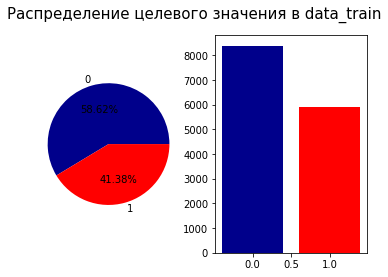

In [ ]:
target = data_train.TARGET.value_counts()
display(target)
print()

plt.suptitle("Распределение целевого значения в data_train", fontsize=15)
plt.subplot(1, 2, 1) 
plt.pie(target, labels=target.index, autopct=lambda v: f"{round(v, 2)}%",
        colors=['darkblue', 'r'])
plt.subplot(1, 2, 2) 
plt.bar(target.index, target.values, color=['darkblue', 'r'])
plt.show()

In [ ]:
tr = set(data_train.id_client.values)
te = set(data_test.id_client.values)
len(tr-te), len(tr&te), len(te-tr)

(6601, 824, 1497)

In [ ]:
print(data_train.OKFS_GROUP.value_counts(), end='\n\n')
print(data_train.OKOPF_GROUP.value_counts(), end='\n\n')
print(data_train.OKOGU_GROUP.value_counts(), end='\n\n')
print(data_train.OKATO_REGIONCODE.value_counts(), end='\n\n')
print(data_train.OKATO_FED.value_counts(), end='\n\n')
print(data_train.OKTMO_CODE.value_counts(), end='\n\n')
print(data_train.OKTMO_FED.value_counts())

Частная собственность                                9912
Государственная собственность                         933
Иностранная собственность                             349
Смешенная российская собственность                    242
Совместная российская и иностранная собственность     104
Name: OKFS_GROUP, dtype: int64

Коммерческая корпоративная организация      10593
Коммерческая унитарная организация            459
Некоммерческая унитарная организация          322
Некоммерческая корпоративная организация       89
Без прав юридического лица                     77
Name: OKOPF_GROUP, dtype: int64

Группировки хозяйствующих субъектов и общественных объединений    11167
Государственная власть в субъектах РФ                               213
Государственная власть в РФ                                         148
Местное самоуправление в РФ                                           9
Name: OKOGU_GROUP, dtype: int64

45.0    2302
46.0     809
40.0     709
65.0     618
3.0      515
        .

In [ ]:
display(pd.crosstab(data_train.OKFS_GROUP, data_train.TARGET))
print()
display(data_train.groupby("OKFS_GROUP").TARGET.mean().round(3))
print()
display(pd.crosstab(data_train.OKOPF_GROUP, data_train.TARGET))
print()
display(pd.crosstab(data_train.OKOGU_GROUP, data_train.TARGET))
print()
display(pd.crosstab(data_train.IP_flag, data_train.TARGET))

TARGET,0,1
OKFS_GROUP,,
Государственная собственность,904,29
Иностранная собственность,77,272
Смешенная российская собственность,236,6
Совместная российская и иностранная собственность,77,27
Частная собственность,5285,4627


OKFS_GROUP
Государственная собственность                        0.031
Иностранная собственность                            0.779
Смешенная российская собственность                   0.025
Совместная российская и иностранная собственность    0.260
Частная собственность                                0.467
Name: TARGET, dtype: float64

TARGET,0,1
OKOPF_GROUP,,
Без прав юридического лица,75,2
Коммерческая корпоративная организация,5736,4857
Коммерческая унитарная организация,456,3
Некоммерческая корпоративная организация,22,67
Некоммерческая унитарная организация,290,32


TARGET,0,1
OKOGU_GROUP,,
Государственная власть в РФ,145,3
Государственная власть в субъектах РФ,200,13
Группировки хозяйствующих субъектов и общественных объединений,6222,4945
Местное самоуправление в РФ,9,0


TARGET,0,1
IP_flag,,
0,6579,4961
1,1811,961


Российская Федерация    1674
Армения                    1
Таджикистан                1
Name: CITIZENSHIP_NAME, dtype: int64


мужской    999
женский    710
Name: SEX_NAME, dtype: int64



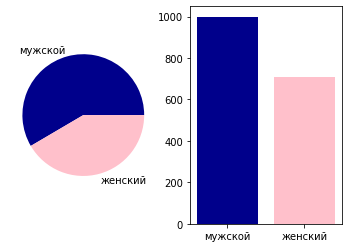




32.0    141
31.0     54
48.0     47
33.0     44
40.0     38
36.0     38
42.0     38
43.0     37
44.0     36
34.0     31
Name: AGE, dtype: int64
...



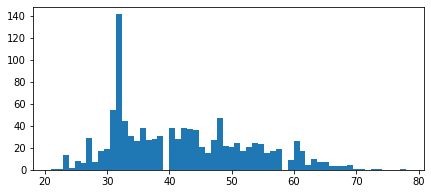

In [ ]:
print(data_train.CITIZENSHIP_NAME.value_counts(), end='\n'*3)

print(data_train.SEX_NAME.value_counts(), end='\n\n')
plt.subplot(1, 2, 1) 
plt.pie(data_train.SEX_NAME.value_counts(), 
        labels=data_train.SEX_NAME.dropna().unique()[::-1], 
        colors=['darkblue', 'pink'])
plt.subplot(1, 2, 2) 
plt.bar(data_train.SEX_NAME.value_counts().index,
        data_train.SEX_NAME.value_counts().values, 
        color=['darkblue', 'pink'])
plt.show()

print('\n\n')
print(data_train.AGE.value_counts().head(10), end='\n...\n\n')
plt.figure(figsize=(7, 3))
plt.hist(data_train.AGE.values, bins=60)
plt.show()

In [ ]:
target_age = data_train.groupby("TARGET").AGE.value_counts(normalize=True) * 100
display(target_age)

print()
ag1 = set(data_train[data_train.TARGET == 1].AGE.value_counts().index)
ag0 = set(data_train[data_train.TARGET == 0].AGE.value_counts().index)
ag0_missing = sorted(ag1-ag0)
ag1_missing = sorted(ag0-ag1)
print(ag0_missing, ag1_missing, len(ag0|ag1), sep='\n')

print()
age0 = target_age[0]
age0 = age0.append(pd.Series({miss_age : 0 for miss_age in ag0_missing}))
age0.sort_index(inplace=True)
age1 = target_age[1]
age1 = age1.append(pd.Series({miss_age : 0 for miss_age in ag1_missing}))
age1.sort_index(inplace=True)

print(len(age0), len(age1))

TARGET  AGE 
0       43.0    4.347826
        44.0    4.047976
        37.0    3.748126
        42.0    3.748126
        34.0    3.598201
                  ...   
1       22.0    0.225225
        24.0    0.225225
        57.0    0.225225
        62.0    0.225225
        67.0    0.225225
Name: AGE, Length: 93, dtype: float64


[22.0]
[21.0, 46.0, 53.0, 61.0, 64.0, 65.0, 66.0, 68.0, 69.0, 70.0, 71.0, 73.0, 74.0, 78.0]
54

54 54


In [ ]:
display(pd.crosstab(data_train.TARGET, data_train.AGE))
display(pd.crosstab(data_train.TARGET, data_train.AGE, normalize=1) * 100)

print(len(pd.crosstab(data_train.AGE, data_train.TARGET)[0].values), 
      len(pd.crosstab(data_train.AGE, data_train.TARGET)[1].values))

AGE,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,...,65.0,66.0,67.0,68.0,69.0,70.0,71.0,73.0,74.0,78.0
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1,0,6,1,2,3,8,2,10,17,...,7,3,2,3,4,1,1,1,1,1
1,0,1,7,1,6,3,21,5,7,2,...,0,0,1,0,0,0,0,0,0,0


AGE,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,29.0,30.0,...,65.0,66.0,67.0,68.0,69.0,70.0,71.0,73.0,74.0,78.0
TARGET,,,,,,,,,,,,,,,,,,,,,
0,100.0,0.0,46.153846,50.0,25.0,50.0,27.586207,28.571429,58.823529,89.473684,...,100.0,100.0,66.666667,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.0,100.0,53.846154,50.0,75.0,50.0,72.413793,71.428571,41.176471,10.526316,...,0.0,0.0,33.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0


54 54


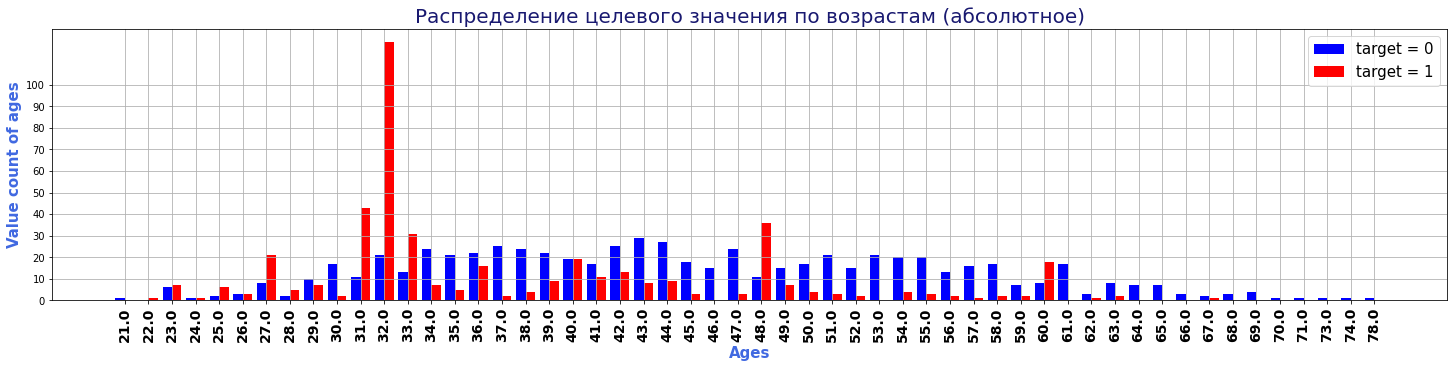

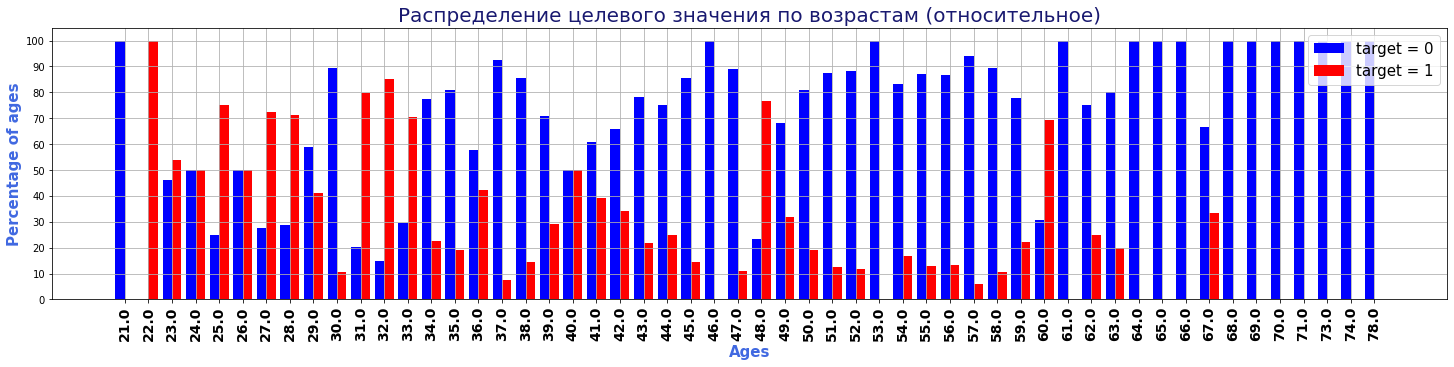

In [ ]:
for i in range(2):
    plt.figure(figsize=(25, 5))
    age_target = pd.crosstab(data_train.AGE, data_train.TARGET, normalize=0) * 100 if i else \
                 pd.crosstab(data_train.AGE, data_train.TARGET)
    sub = "относительное" if i else "абсолютное"
    plt.title(f"Распределение целевого значения по возрастам ({sub})", fontsize=20, color='midnightblue')
    width = 0.4
    ids = np.arange(len(age_target))
    plt.bar(ids - width / 2, age_target[0].values, width, label='target = 0', color='b')
    plt.bar(ids + width / 2, age_target[1].values, width, label='target = 1', color='r')
    plt.xticks(ids, age_target.index, fontsize=14, fontweight='bold', rotation=90)
    plt.yticks(range(0, 101, 10))

    info = 'Percentage' if i else 'Value count'
    plt.xlabel('Ages', fontsize=15, color='royalblue', fontweight='bold')
    plt.ylabel(f'{info} of ages', fontsize=15, color='royalblue', fontweight='bold')
    plt.legend(fontsize=15, loc="upper right")
    plt.grid(True)
    plt.show()

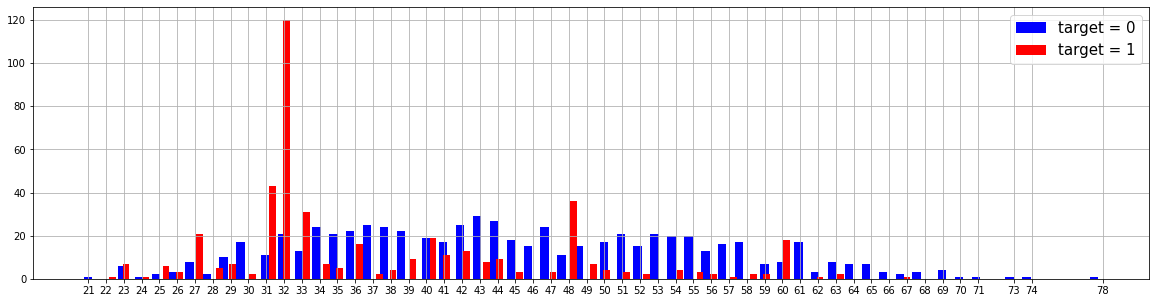

In [ ]:
plt.figure(figsize=(20, 5))
plt.hist(data_train[data_train.TARGET == 0].AGE.values, bins=120, 
         align='left', color='b', label='target = 0')
plt.hist(data_train[data_train.TARGET == 1].AGE.values, bins=120, 
         align='right', color='r', label='target = 1')
plt.xticks(data_train.AGE.value_counts().index)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()

In [ ]:
data_train[(data_train.AGE == 48.0) & (data_train.TARGET == 1)].id_client.value_counts()

8830    33
9154     1
6616     1
3184     1
Name: id_client, dtype: int64

In [ ]:
data_train[(data_train.id_client == 8830)]

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,...,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
436,1176,8830,29JAN2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
510,7313,8830,02JUL2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
818,7540,8830,05JUL2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
923,7492,8830,04JUL2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
2571,7415,8830,03JUL2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
2729,1100,8830,28JAN2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
3102,1174,8830,29JAN2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
3835,7490,8830,04JUL2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
3847,7539,8830,05JUL2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация
4304,7314,8830,02JUL2018:00:00:00,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23AUG1970:00:00:00,48.0,женский,Российская Федерация


In [ ]:
data_train.corr()["TARGET"].drop(labels=["TARGET"]).idxmax(),  data_train.corr()["TARGET"].drop(labels=["TARGET"]).max()

('SUM_233_YEAR', 0.16896834292183413)

### Взаимосвязи между тренировочным и тестовым датасетами

In [ ]:
data_test.TARGET

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3574   NaN
3575   NaN
3576   NaN
3577   NaN
3578   NaN
Name: TARGET, Length: 3579, dtype: float64

### Генерация новых признаков датасета и преобразование старых признаков


> Все даты оканчиваются на `'00:00:00'`, => можно обрезать

In [ ]:
data_train.SIGN_DATE[:2]

0    13MAR2018:00:00:00
1    12SEP2018:00:00:00
Name: SIGN_DATE, dtype: object

In [ ]:
data_train.SIGN_DATE.map(lambda s: s.split(':')[1:] == ['00'] * 3).all()

True

In [ ]:
columns_date = [name for name in data_test.columns if 'DATE' in name]
for column in columns_date:
    print(column, data_test[column].str[-8:].unique())

SIGN_DATE ['00:00:00']
DATEFIRSTREG ['00:00:00' nan]
TAXREG_REGDATE ['00:00:00' nan]
TAXREGPAY_REGDATE ['00:00:00' nan]
BIRTHDATE [nan '00:00:00']


> важен **"контекст" клиента**:
* были ли подписаны договора в ближайшие дни
* что было в этот же день
* какой по счету это контракт для клиента
* как менялись финансовые показатели клиента

In [ ]:
data_train[(data_train.id_client == 10868)].sort_values("SIGN_DATE")

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,F1180,F1190,F1200,F1210,F1220,F1230,F1240,F1250,F1260,F1300,F1310,F1320,F1350,F1360,F1370,F1400,F1410,F1420,F1450,F1500,F1510,F1520,F1530,F1550,F1600,F1700,F2100,F2110,F2120,F2200,F2210,F2220,F2300,F2310,F2320,F2330,F2340,F2350,F2400,F2410,F1150_LAG1,F1230_LAG1,F1410_LAG1,F1510_LAG1,F1520_LAG1,F2110_LAG1,F2120_LAG1,F2200_LAG1,F2210_LAG1,F2220_LAG1,F2300_LAG1,F2320_LAG1,F2330_LAG1,F2400_LAG1,EGRPOINCLUDED,DATEFIRSTREG,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,OKATO_REGIONCODE,OKATO_FED,OKTMO_CODE,OKTMO_FED,WORKERSRANGE,TAXREG_REGDATE,TAXREGPAY_REGDATE,COUNTCOOWNERFCSM,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE,PLAINTIFF_CASESNUMBER_YEAR,PLAINTIFF_SUM_YEAR,DEFENDANT_CASESNUMBER_YEAR,DEFENDANT_SUM_YEAR,THIRDOROTHERPERSON_YEAR,PLAINTIFF_CASESNUMBER_EVER,PLAINTIFF_SUM_EVER,DEFENDANT_CASESNUMBER_EVER,DEFENDANT_SUM_EVER,THIRDOROTHERPERSON_EVER,ADMITTEDNUMBER_233_YEAR,NOTADMITTEDNUMBER_233_YEAR,WINNERNUMBER_233_YEAR,SIGNEDNUMBER_233_YEAR,SUM_233_YEAR,ADMITTEDNUMBER_233_EVER,NOTADMITTEDNUMBER_233_EVER,WINNERNUMBER_233_EVER,SIGNEDNUMBER_233_EVER,SUM_233_EVER,ADMITTEDNUMBER_95_YEAR,NOTADMITTEDNUMBER_95_YEAR,WINNERNUMBER_95_YEAR,SIGNEDNUMBER_95_YEAR,SUM_95_YEAR,ADMITTEDNUMBER_95_EVER,NOTADMITTEDNUMBER_EVER,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
5805,4670,10868,03MAY2018:00:00:00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256928000.0,NaN,NaN,166971000.0,70428000.0,19529000.0,NaN,244553000.0,10000.0,NaN,NaN,NaN,244543000.0,NaN,NaN,NaN,NaN,12375000.0,NaN,12375000.0,NaN,NaN,256928000.0,256928000.0,102285000.0,102928000.0,643000.0,100311000.0,1158000.0,816000.0,103234000.0,NaN,374000.0,NaN,4204000.0,1655000.0,98497000.0,NaN,NaN,122723000.0,NaN,NaN,9532000.0,60624000.0,NaN,58568000.0,1606000.0,450000.0,60067000.0,45000.0,NaN,56104000.0,1.0,11JUN2009:00:00:00,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,45.0,30.0,4.592500e+10,30.0,0 .. 5,11JUN2009:00:00:00,01JAN1960:00:00:00,0.0,1.0,5.0,0.0,0.0,0.0,4.0,7.0,2.0,2.0,18.13,23.0,8918889.0,0.0,0.0,1.0,62.0,19187840.0,5.0,312650.0,4.0,943.0,123.0,550.0,480.0,582584717.0,2082.0,486.0,1101.0,831.0,9.636683e+08,6711.0,64.0,3146.0,2484.0,406062323.0,26702.0,511.0,13925.0,13037.0,2.303416e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11598,3674,10868,06APR2018:00:00:00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256928000.0,NaN,NaN,166971000.0,70428000.0,19529000.0,NaN,244553000.0,10000.0,NaN,NaN,NaN,244543000.0,NaN,NaN,NaN,NaN,12375000.0,NaN,12375000.0,NaN,NaN,256928000.0,256928000.0,102285000.0,102928000.0,643000.0,100311000.0,1158000.0,816000.0,103234000.0,NaN,374000.0,NaN,4204000.0,1655000.0,98497000.0,NaN,NaN,122723000.0,NaN,NaN,9532000.0,60624000.0,NaN,58568000.0,1606000.0,450000.0,60067000.0,45000.0,NaN,56104000.0,1.0,11JUN2009:00:00:00,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,45.0,30.0,4.592500e+10,30.0,0 .. 5,11JUN2009:00:00:00,01JAN1960:00:00:00,0.0,1.0,5.0,0.0,0.0,0.0,4.0,7.0,2.0,2.0,18.13,23.0,8918889.0,0.0,0.0,1.0,62.0,19187840.0,5.0,312650.0,4.0,943.0,123.0,550.0,480.0,582584717.0,2082.0,486.0,1101.0,831.0,9.636683e+08,6711.0,64.0,3146.0,2484.0,406062323.0,26702.0,511.0,13925.0,13037.0,2.303416e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8615,12751,10868,07DEC2018:00:00:00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256928000.0,NaN,NaN,166971000.0,70428000.0,19529000.0,NaN,244553000.0,10000.0,NaN,NaN,NaN,244543000.0,NaN,NaN,NaN,NaN,12375000.0,NaN,12375000.0,NaN,NaN,256928000.0,256928000.0,102285000.0,102928000.0,643000.0,100311000.0,1158000.0,816000.0,103234000.0,NaN,374000.0,NaN,4204000.0,1655000.0,98497000.0,NaN,NaN,122723000.0,NaN,NaN,9532000.0,60624000.0,NaN,58568000.0,1606000.0,450000.0,60067000.0,45000.0,Na

Конвертируем время в формат `datetime` и добавляем новые признаковые даты 

In [ ]:
def make_datetime(data):
    columns_date = [name for name in data.columns if 'DATE' in name]
    for column in columns_date:
        data[column] = pd.to_datetime(data[column].astype(str).map(lambda s: s.split(':')[0])) #, format='%d%b%Y:%X')

    data["SIGN_DATE" + "_year"] = data["SIGN_DATE"].dt.year
    data["SIGN_DATE" + "_month"] = data["SIGN_DATE"].dt.month
    data["SIGN_DATE" + "_dayofyear"] = data["SIGN_DATE"].dt.dayofyear
    data["SIGN_DATE" + "_day_of_week"] = data["SIGN_DATE"].dt.day_of_week
    return data
    #print(data_train.SIGN_DATE[:2])

Добавляем информацию о количестве контрактов и текущем его номере для каждого клиента

In [ ]:
def make_clients(data):
    data['c'] = 1
    # 'cumsum' - коммутативная (накапливающая) сумма - какой по счету контракт клиента (начиная с 1)
    data['n_contract_client'] = data.groupby('id_client')['c'].transform('cumsum')
    #data['nall_contract_client'] = data.groupby('id_client')['c'].transform('sum')
    #data['p_contract_client'] = data['n_contract_client'] / data['nall_contract_client']
    # не совсем честные, поскольку заглядываем вперед на будущие подписанные контракты
    return data

Преобразуем категориальные признаки, заполняем пропуски

In [ ]:
def make_category(data):
    data['CITIZENSHIP_NAME'] = data['CITIZENSHIP_NAME'].fillna(-1).map({-1: -1, 'Российская Федерация': 4, 'Таджикистан': 3, 'Казахстан': 2, 'Армения': 1})
    data['SEX_NAME'] = data['SEX_NAME'].fillna(0).map({0: 0, 'мужской': 1, 'женский': -1})
    group_names = ['OKFS_GROUP', 'OKOPF_GROUP', 'OKOGU_GROUP'] + ['WORKERSRANGE', 'OKVED_CODE']
    date_names = ['SIGN_DATE', 'DATEFIRSTREG', 'TAXREG_REGDATE', 'TAXREGPAY_REGDATE', 'BIRTHDATE']
    for name in group_names + date_names + ['id_client']:
        data[name] = data[name].fillna(-1)
        tmp = data[name].value_counts()
        tmp = tmp + 0.1 * np.random.randn(len(tmp)) # заполнение с небольшими погрешностями (иначе много одинаковых(=1))
        data[name] = data[name].map(tmp)
    return data

Добавляем относительные финансовые показатели, заполняем пропуски

In [ ]:
def make_F(data):
    data['g'] = data['SIGN_DATE_year'].astype(str) + data['SIGN_DATE_month'].astype(str)

    columns_F = [name for name in data.columns if name.startswith('F')]
    for name in columns_F:
        data[name] = data[name].fillna(0.0)
        data[name + '_normed'] = data[name] / data.groupby('g')[name].transform('mean')
        # перевод финансовых покателей в относительные значения от среднего значения финансов клиента за данный временной промежуток
    return data

Функция предобработки данных

In [ ]:
def makeX(data, make_date=True):
    if make_date:
        data = make_datetime(data)
        #data = data.sort_values(by=['SIGN_DATE'])
    data = make_clients(data)
    data = make_category(data)
    data = make_F(data)
    
    data.fillna(-1, inplace=True)

    del data['c']  #data = data.drop('c')
    del data['g']
    #del data['id_client']
    return data

Обработка данных (*train, test dataset*), получение целевых значений (*y*)

In [ ]:
data_train_copy = data_train.copy()
data_train = makeX(data_train) # обрабатываем обучение
data_test = makeX(data_test)   # обрабатываем тест

In [ ]:
y = data_train.pop('TARGET').values       # целевые значения
y_test = data_test.TARGET
data_test = data_test[data_train.columns] # на всякий случай - вдруг, перемешаны столбцы

In [ ]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
y_test.values

array([-1., -1., -1., ..., -1., -1., -1.])

In [ ]:
data_train.head()

,id_contract,id_client,SIGN_DATE,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,...,F2110_LAG1_normed,F2120_LAG1_normed,F2200_LAG1_normed,F2210_LAG1_normed,F2220_LAG1_normed,F2300_LAG1_normed,F2320_LAG1_normed,F2330_LAG1_normed,F2400_LAG1_normed,FLAG_DISQUALIFICATION_normed
7655,34,15.009825,56.04267,0,3.797951e+10,0.0,1.121144e+09,0.0,3.672917e+10,5.113300e+07,...,15.801229,14.500002,13.250679,20.198207,0.000000,6.680931,3.382540,10.666879,7.252659,-1.0
12287,57,18.867956,56.04267,0,2.293712e+11,203998000.0,1.470401e+11,0.0,7.329455e+10,6.552807e+09,...,44.194196,57.651340,111.100592,0.000000,0.000000,8.933930,35.165582,136.887240,3.841820,-1.0
6843,60,0.910973,56.04267,0,7.496600e+07,0.0,5.254400e+07,0.0,0.000000e+00,2.242200e+07,...,0.042073,0.054329,0.113540,0.000000,0.000000,0.233350,0.000000,0.000000,0.244715,-1.0
6802,55,11.922842,56.04267,0,1.434250e+09,719000.0,1.316643e+09,0.0,0.000000e+00,9.429700e+07,...,7.209838,6.665025,1.871221,9.361689,11.708189,1.680068,7.253921,0.962013,0.542850,-1.0
6800,2,0.941548,56.04267,1,0.000000e+00,0.0,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0


### Обучение модели и подбор параметров

In [ ]:
import lightgbm as lgb

In [ ]:
params1 = {
          "objective": "binary",
          "metric": "binary_logloss", # "auc"
          "num_leaves": 32,
          "learning rate": 0.04,
          "bagging_fraction": 0.7, # "subsample": 0.7
          "subsample_freq": 1,
          "colsample_bytree": 0.7,
          "verbosity": -1
          }

p1 = lgb.cv(params1, train_set=lgb.Dataset(data_train, y), num_boost_round=800)

In [ ]:
params2 = {
          "objective": "binary",
          "metric": "binary_logloss",
          "num_leaves": 16,
          "learning rate": 0.07,
          "bagging_fraction": 0.7, 
          "subsample_freq": 1,
          "colsample_bytree": 0.7,
          "verbosity": -1
          }

p2 = lgb.cv(params2, train_set=lgb.Dataset(data_train, y), num_boost_round=800)

In [ ]:
params3 = {
          "objective": "binary",
          "metric": "binary_logloss", 
          "num_leaves": 8,
          "learning rate": 0.9,
          "bagging_fraction": 0.7,
          "subsample_freq": 1,
          "colsample_bytree": 0.7,
          "verbosity": -1
          }

p3 = lgb.cv(params3, train_set=lgb.Dataset(data_train, y), num_boost_round=800)

(0.2, 0.5)

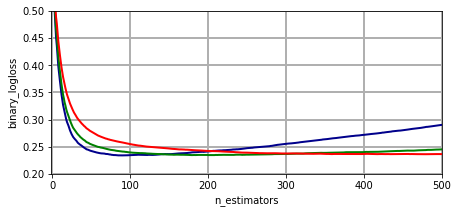

In [ ]:
plt.figure(figsize=(7, 3))
plt.plot(p1['binary_logloss-mean'], lw=2, c='darkblue')
plt.plot(p2['binary_logloss-mean'], lw=2, c='green')
plt.plot(p3['binary_logloss-mean'], lw=2, c='red')
plt.grid(lw=2)
plt.xlabel("n_estimators")
plt.ylabel("binary_logloss")
plt.xlim([-1, 500])
plt.ylim([0.2, 0.5])

In [ ]:
for p in (p1, p2, p3):
    minimum = min(p['binary_logloss-mean'])
    print(minimum, p['binary_logloss-mean'].index(minimum))

0.23147175692278005 130
0.23301482848807598 181
0.2355864846342098 372


1. Разбиваем тренировочный датасет на train и test, подобно реальному разбиению на train (прошедшие даты) и test (будущие даты) ~ задача прогнозирования

2. Помимо этого в реальных train и test почти нет пересечений по id клиентов, => удаляем из нашего теста те id, которые попали в train

> Наш тест должен имитировать реальный!

In [ ]:
data_train_copy = make_datetime(data_train_copy)
#data_train_copy = data_train_copy.sort_values(by=['SIGN_DATE'])

i = data_train_copy['SIGN_DATE'] >= pd.to_datetime("01-01-2019")

A1 = set(data_train_copy[~i].id_client.values)
A2 = set(data_train_copy[i].id_client.values)

i1 = data_train_copy['SIGN_DATE'] < pd.to_datetime("01-01-2019")
i2 = ((data_train_copy['SIGN_DATE'] >= pd.to_datetime("01-01-2019")) & data_train_copy.id_client.isin(A2-A1))

In [ ]:
p = np.array([len(A1-A2), len(A1&A2), len(A2-A1)])
print(p, (p / np.sum(p)).round(2))

[5726  515 1184] [0.77 0.07 0.16]


In [ ]:
data = makeX(data_train_copy, False)
data.pop('TARGET')

X1, X2 = data[i1], data[i2]
y1, y2 = y[i1], y[i2]

X1.shape, y1.shape, X2.shape, y2.shape

((11472, 190), (11472,), (1414, 190), (1414,))

In [ ]:
tmp = lgb.train(params1, train_set=lgb.Dataset(X1, y1),
                valid_sets=[lgb.Dataset(X2, y2), lgb.Dataset(X1, y1)],
                num_boost_round=1000, verbose_eval=50)

[50]	valid_0's binary_logloss: 0.337497	valid_1's binary_logloss: 0.189098
[100]	valid_0's binary_logloss: 0.341237	valid_1's binary_logloss: 0.131393
[150]	valid_0's binary_logloss: 0.349487	valid_1's binary_logloss: 0.0967127
[200]	valid_0's binary_logloss: 0.373823	valid_1's binary_logloss: 0.0729306
[250]	valid_0's binary_logloss: 0.384688	valid_1's binary_logloss: 0.0550925
[300]	valid_0's binary_logloss: 0.412599	valid_1's binary_logloss: 0.0421139
[350]	valid_0's binary_logloss: 0.431975	valid_1's binary_logloss: 0.0323354
[400]	valid_0's binary_logloss: 0.453394	valid_1's binary_logloss: 0.024736
[450]	valid_0's binary_logloss: 0.485034	valid_1's binary_logloss: 0.019142
[500]	valid_0's binary_logloss: 0.50133	valid_1's binary_logloss: 0.0147991
[550]	valid_0's binary_logloss: 0.522235	valid_1's binary_logloss: 0.0116504
[600]	valid_0's binary_logloss: 0.544853	valid_1's binary_logloss: 0.00902634
[650]	valid_0's binary_logloss: 0.573159	valid_1's binary_logloss: 0.00703252
[70

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV 

params4 = {
          "objective": "binary:logistic",
          "eval_metric": "logloss",
          "n_estimators": 100,
          "max_depth": 2,
          "learning rate": 0.05,
          "nthread": 4
          }


xgb_model = xgb.XGBClassifier(params4)

test_params = {
 'max_depth': [2, 4, 8, 12, 16]
}

model = GridSearchCV(estimator = xgb_model, param_grid = test_params)
#model.fit(data_train, y)
#print(model.best_params_)

In [ ]:
tmp2 = xgb.train(params4, xgb.DMatrix(X1, y1), 
                 evals=[(xgb.DMatrix(X2, y2), 'test')], 
                 num_boost_round=500, verbose_eval=50)

[0]	test-logloss:0.590223
[50]	test-logloss:0.355759
[100]	test-logloss:0.355446
[150]	test-logloss:0.357333
[200]	test-logloss:0.356654
[250]	test-logloss:0.361751
[300]	test-logloss:0.370396
[350]	test-logloss:0.374402
[400]	test-logloss:0.377618
[450]	test-logloss:0.384774
[499]	test-logloss:0.385671


In [ ]:
model = lgb.LGBMClassifier(**params1, n_estimators=113)#=105)
model2 = xgb.XGBClassifier(**params4, n_jobs=4)

In [ ]:
model.fit(data_train, y)
a_lgb = model.predict_proba(data_test)[:, 1] # получаем ответ
a_lgb

array([0.0011871 , 0.97673012, 0.08187125, ..., 0.94718731, 0.30178006,
       0.00301803])

In [ ]:
model2.fit(data_train, y)
a_xgb = model2.predict_proba(data_test)[:, 1] # получаем ответ
a_xgb

array([0.01438831, 0.88655233, 0.13947502, ..., 0.80853367, 0.27843007,
       0.0219305 ], dtype=float32)

In [ ]:
#from sklearn.metrics import roc_auc_score
#roc_auc_score(y_test, a_lgb)
#log_loss(y_test, a_lgb)

Ансамбль

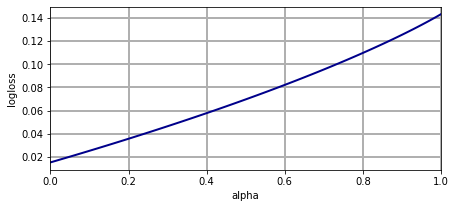

In [ ]:
from sklearn.metrics import log_loss

ls = np.linspace(0, 1, 101)
logs = [log_loss(y, alpha*a_lgb2 + (1 - alpha)*a_xgb2) for alpha in ls]
plt.figure(figsize=(7, 3))
plt.plot(ls, logs, lw=2, c='darkblue')
plt.xlabel("alpha")
plt.ylabel("logloss")
plt.xlim([0, 1])
#plt.ylim([0.93, 0.96])
plt.grid(lw=2)

Значимость признаков

(-1.0, 191.0)

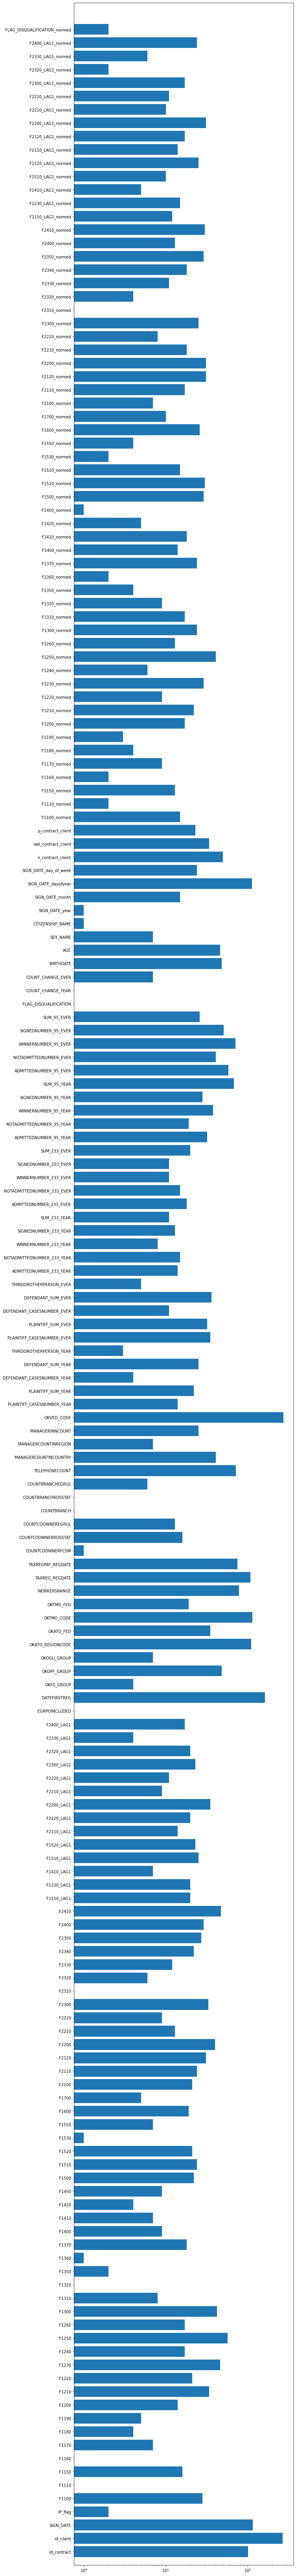

In [ ]:
plt.figure(figsize=(10, 120))
plt.barh(np.arange(data_train.shape[1]), model.feature_importances_);
plt.yticks(np.arange(data_train.shape[1]), data_train.columns)
plt.xscale('log')
plt.ylim([-1, data_train.shape[1] + 1])

Запись полученного ответа на тесте в выходной файл

In [ ]:
df = pd.DataFrame({'id_contract': data_test.id_contract.values, 'TARGET': a_lgb})
df.to_csv('/content/drive/MyDrive/sccl/ans_1.csv', sep=',', index=False) # сохраняем ответ

Пересортировка обратно согласно индексам `ans2` (порядку `id_contract` в изначальном тестовом датасете)

In [ ]:
d0 = pd.read_csv("/content/drive/MyDrive/sccl/ans2.csv", delimiter=',')

df_copy = df.copy()
df_copy = df_copy.set_index('id_contract')
df_copy = df_copy.reindex(index=d0['id_contract'])
df_copy = df_copy.reset_index()
display(df_copy)

#df_copy.to_csv('/content/drive/MyDrive/sccl/ans_2_2.csv', sep=',', index=False)

,id_contract,TARGET
0,1293,0.001769
1,1962,0.987894
2,6350,0.138853
3,14567,0.008200
4,9267,0.087338
...,...,...
3574,6740,0.288139
3575,15156,0.009109
3576,13941,0.951080
3577,10448,0.324877


In [ ]:
d = pd.read_csv("/content/drive/MyDrive/sccl/ans_2.csv", delimiter=',')
display(d0) 
print()
display(d)

,id_contract,TARGET
0,1293,0.002587
1,1962,0.996527
2,6350,0.025392
3,14567,0.012488
4,9267,0.045070
...,...,...
3574,6740,0.085378
3575,15156,0.007554
3576,13941,0.976556
3577,10448,0.154962


,id_contract,TARGET
0,33,0.004663
1,29,0.005157
2,23,0.003085
3,67,0.002429
4,39,0.004646
...,...,...
3574,17855,0.966286
3575,17865,0.109656
3576,17854,0.672810
3577,17857,0.392128
